<div align="center">
    <br>
    <h1 style="color:#C71585;">KNN Implementation Activity</h1>
    <br>
</div>

<div style="height: 10px; background-color: #FFC0CB; border-radius: 2px;"></div>  

<br> 
<br> 
MUGOT, Chris Jallaine S
<br> 2022307205  


#### **Datasets Overview**  

#### **Dataset 1 - Iris Dataset**  
> The Iris dataset is a well-known dataset in machine learning, consisting of 150 instances of iris flowers categorized into three species: Setosa, Versicolor, and Virginica. Each instance has four features: sepal length, sepal width, petal length, and petal width.

#### **Dataset 2 - Breast Cancer Dataset**  
> The Breast Cancer dataset (from `sklearn.datasets.load_breast_cancer`) contains features derived from digitized images of breast mass biopsies. The dataset helps classify tumors as malignant or benign based on features such as radius, texture, perimeter, and smoothness.

#### **Dataset 3 - UPCAT Dataset**  
> upcat scores of students who either failed/passed the admission test and their scores on different subjects.



#### **Objectives**  

- ✅ **Implement the K-Nearest Neighbors (KNN) algorithm** on multiple datasets and analyze its performance.  
- ✅ **Evaluate the impact of different feature selections** and hyperparameter tuning on KNN accuracy.  
- ✅ **Compare the classification results across different datasets** and discuss findings.  

<div style="height: 3px; background-color: black; border-radius: 2px;"></div>  

#### LIBRARIES :

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import mglearn 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In the next sections, we will **implement the K-Nearest Neighbors (KNN) algorithm** by running **50 trials** for each dataset. The primary objective is to evaluate how KNN performs under different conditions and determine the **optimal value of `n_neighbors`** that best fits the dataset.

---

#### **Implementation Details**  

- **Trials:** We will run the KNN classifier **50 times** to ensure stable results and account for randomness in dataset splits.  
- **Random State:** We set `random_state = None` in our trials.  
  - This allows for **different random splits** in each run, preventing bias from a fixed train-test split.  
  - This ensures that our **results generalize well** across different partitions of the dataset.  
  - By averaging across 50 trials, we obtain a **more reliable estimate** of KNN’s performance.  
- **Accuracy Analysis:** We will compute and **plot the mean accuracy** across trials for different values of `n_neighbors`.  
- **Optimal `n_neighbors`:** The best value of `n_neighbors` will be determined by selecting the one that achieves the **highest mean accuracy** across trials.

---

#### **Expected Outcome**  

✅ A **visual representation** of how `n_neighbors` affects accuracy.  
✅ Identification of the **best `n_neighbors`** value for each dataset.  
✅ A more **robust and unbiased evaluation** of KNN’s performance.

<div style="height: 3px; background-color: black; border-radius: 2px;"></div>  

---

## **DATASET 1: Iris Dataset**

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

#### Exploring the DATA

In [3]:
print("Important Keys: \n{}".format(iris_dataset.keys()))

Important Keys: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_dataset.data.shape)

(150, 4)


#### Understanding Targets

In [5]:
for i, name in enumerate(iris_dataset['target_names'], start=1):
    print(f"target {i}: {name}")

target 1: setosa
target 2: versicolor
target 3: virginica


#### Understanding Features

In [6]:
for i, name in enumerate(iris_dataset['feature_names'], start=1):
    print(f"feature {i}: {name}")

feature 1: sepal length (cm)
feature 2: sepal width (cm)
feature 3: petal length (cm)
feature 4: petal width (cm)


In [7]:
unique_targets = set(iris_dataset['target'])
for target in unique_targets:
    print(f"{target}: {iris_dataset['target_names'][target]}")

0: setosa
1: versicolor
2: virginica


#### Distribution of Classes

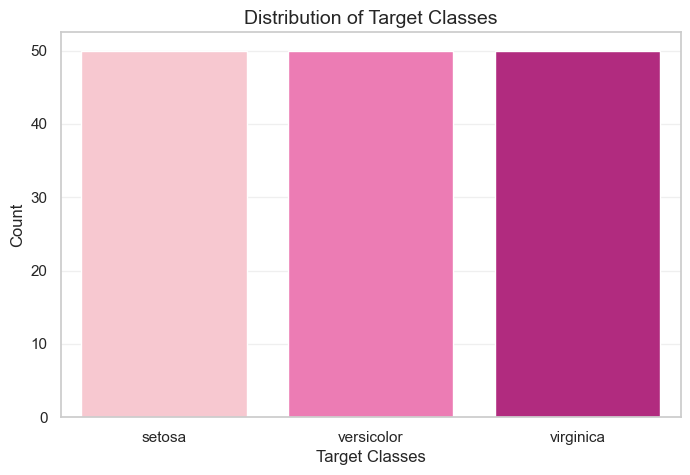

In [75]:
target_names = [iris_dataset['target_names'][t] for t in iris_dataset['target']]
target_dist = pd.DataFrame({"Target Class": target_names})

pink_palette = ["#FFC0CB", "#FF69B4", "#C71585"]  

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=target_dist, x="Target Class", palette=pink_palette)

plt.xlabel("Target Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Target Classes", fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()

## **KNN Implementation**

In [9]:
X, y = iris_dataset.data, iris_dataset.target

In [10]:
# Define range for n_neighbors
n_range = range(1, 41)
num_trials = 50  # Number of trials

In [11]:
# Store accuracies
accuracy_scores = {n: [] for n in n_range}

In [12]:
# Perform 50 trials
for _ in range(num_trials):
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=None)

    for n in n_range:
        # Create and train KNN classifier
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        accuracy_scores[n].append(accuracy)

In [13]:
# Compute mean accuracy for each n_neighbors
mean_accuracies = np.array([np.mean(accuracy_scores[n]) for n in n_range])

In [14]:
# Print mean scores before plotting
print("Mean Accuracy Scores:")
for n, acc in zip(n_range, mean_accuracies):
    print(f"n_neighbors={n}: {acc:.4f}")

Mean Accuracy Scores:
n_neighbors=1: 0.9567
n_neighbors=2: 0.9413
n_neighbors=3: 0.9600
n_neighbors=4: 0.9553
n_neighbors=5: 0.9633
n_neighbors=6: 0.9607
n_neighbors=7: 0.9653
n_neighbors=8: 0.9647
n_neighbors=9: 0.9640
n_neighbors=10: 0.9613
n_neighbors=11: 0.9653
n_neighbors=12: 0.9647
n_neighbors=13: 0.9680
n_neighbors=14: 0.9613
n_neighbors=15: 0.9693
n_neighbors=16: 0.9633
n_neighbors=17: 0.9673
n_neighbors=18: 0.9533
n_neighbors=19: 0.9607
n_neighbors=20: 0.9480
n_neighbors=21: 0.9513
n_neighbors=22: 0.9453
n_neighbors=23: 0.9527
n_neighbors=24: 0.9433
n_neighbors=25: 0.9453
n_neighbors=26: 0.9467
n_neighbors=27: 0.9473
n_neighbors=28: 0.9447
n_neighbors=29: 0.9473
n_neighbors=30: 0.9387
n_neighbors=31: 0.9433
n_neighbors=32: 0.9373
n_neighbors=33: 0.9480
n_neighbors=34: 0.9413
n_neighbors=35: 0.9447
n_neighbors=36: 0.9373
n_neighbors=37: 0.9407
n_neighbors=38: 0.9367
n_neighbors=39: 0.9407
n_neighbors=40: 0.9293


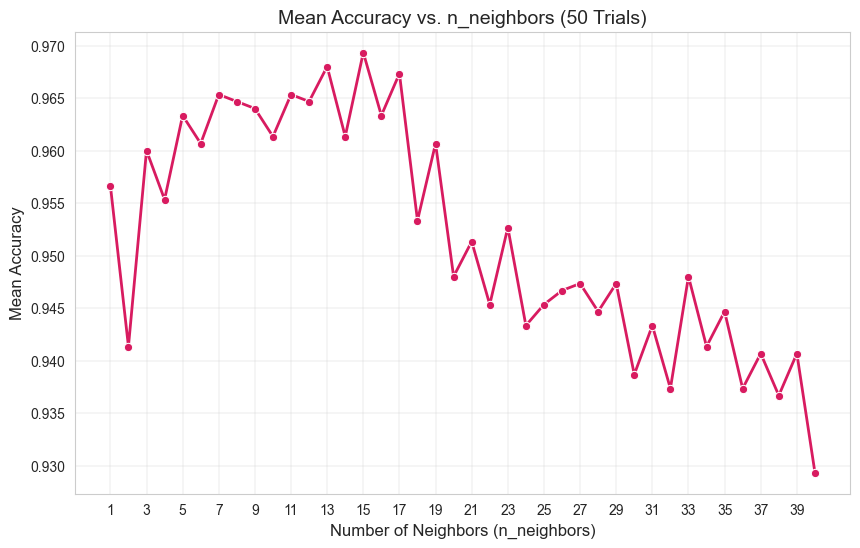

In [15]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.grid(color='lightgray', linestyle='-', linewidth=0.3)

sns.lineplot(x=list(n_range), y=mean_accuracies, marker="o", linewidth=2, markersize=6, color="#D81B60")  

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Mean Accuracy vs. n_neighbors (50 Trials)", fontsize=14)
plt.xticks(range(1, 41, 2))
plt.show()

### Analysis of the Graph

The graph shows the relationship between the mean accuracy of a model and the number of neighbors (n_neighbors) used in the model, based on 50 trials. The x-axis represents the number of neighbors, ranging from 1 to 39, while the y-axis represents the mean accuracy, ranging from 0.930 to 0.970.

**Key observations:**
- The mean accuracy generally increases as the number of neighbors increases from 1 to around 13.
- The highest mean accuracy is observed around 13-15 neighbors, with a value close to 0.970.
- After reaching the peak, the mean accuracy starts to decline as the number of neighbors increases beyond 13.
- There are fluctuations in the mean accuracy, but the overall trend shows a decrease in accuracy with a higher number of neighbors beyond 13.
- The lowest mean accuracy is observed at 40 neighbors, with a value slightly above 0.930.

This graph helps in understanding the optimal number of neighbors to use in a model to achieve the highest accuracy. It shows that using too many neighbors can lead to a decrease in model performance.


In [16]:
# Find optimal n_neighbors
optimal_n = list(n_range)[np.argmax(mean_accuracies)]
optimal_accuracy = max(mean_accuracies)

print("Optimal n_neighbor:")
print(f"n_neighbors = {optimal_n}")
print(f"Mean Accuracy : {optimal_accuracy:.4f}")

Optimal n_neighbor:
n_neighbors = 15
Mean Accuracy : 0.9693


#### Evaluate The Model

In [17]:
# Split dataset into training and testing sets (one last time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=None)

# Train the KNN classifier with the optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=optimal_n)
knn.fit(X_train, y_train)

# Compute accuracy on training and testing sets
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

# Display results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Check for Overfitting or Underfitting
if train_accuracy > test_accuracy + 0.05:  # If training accuracy is much higher
    print("⚠️ The model might be **overfitting** (performing too well on training but not generalizing).")
elif test_accuracy > train_accuracy:
    print("⚠️ The model might be **underfitting** (not learning enough from training data).")
else:
    print("✅ The model seems well-balanced (good generalization).")

Training Accuracy: 0.9750
Testing Accuracy: 0.9667
✅ The model seems well-balanced (good generalization).


#### Evaluating Performance

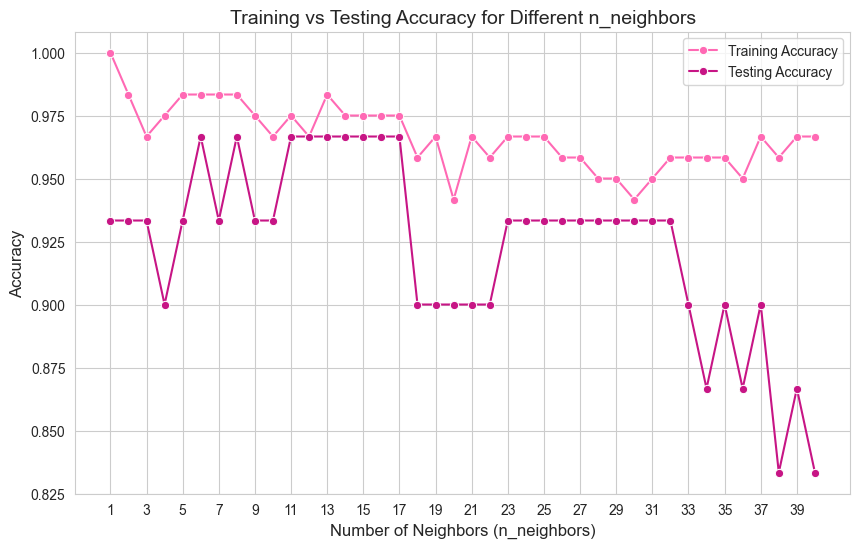

In [18]:
# Lists to store accuracy values
train_accuracies = []
test_accuracies = []

for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Store training and testing accuracy
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot Training Accuracy (Light Pink)
sns.lineplot(x=list(n_range), y=train_accuracies, label="Training Accuracy", marker="o", color="#FF69B4")

# Plot Testing Accuracy (Deep Pink)
sns.lineplot(x=list(n_range), y=test_accuracies, label="Testing Accuracy", marker="o", color="#C71585")

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy for Different n_neighbors", fontsize=14)
plt.xticks(range(1, 41, 2))
plt.legend()
plt.show()


### Analysis of the Graph: Training vs Testing Accuracy for Different n_neighbors

The graph compares the accuracy of a machine learning model's training and testing phases across different numbers of neighbors (n_neighbors) in a k-nearest neighbors (KNN) algorithm. Here's a breakdown of the key observations:

**X-axis:** Number of neighbors (n_neighbors), ranging from 1 to 40.
**Y-axis:** Accuracy, ranging from 0.825 to 1.000.

**Key observations:**

1. **Training Accuracy (Pink Line):**
   - The training accuracy is generally higher than the testing accuracy, especially for lower values of n_neighbors.
   - As the number of neighbors increases, the training accuracy decreases slightly but remains relatively high.

2. **Testing Accuracy (Purple Line):**
   - The testing accuracy fluctuates more and shows a noticeable drop for higher values of n_neighbors.
   - At lower values of n_neighbors, the testing accuracy is closer to the training accuracy but starts to diverge as the number of neighbors increases.

**Implications:**
- The KNN model performs better with fewer neighbors in terms of training accuracy, but this may lead to overfitting.
- As the number of neighbors increases, the model generalizes better but at the cost of reduced accuracy, indicating a trade-off between overfitting and underfitting.

#### Model Performance

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=None)

knn = KNeighborsClassifier(n_neighbors=optimal_n)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.95


## **Best Features Selection**

#### See Correlations:

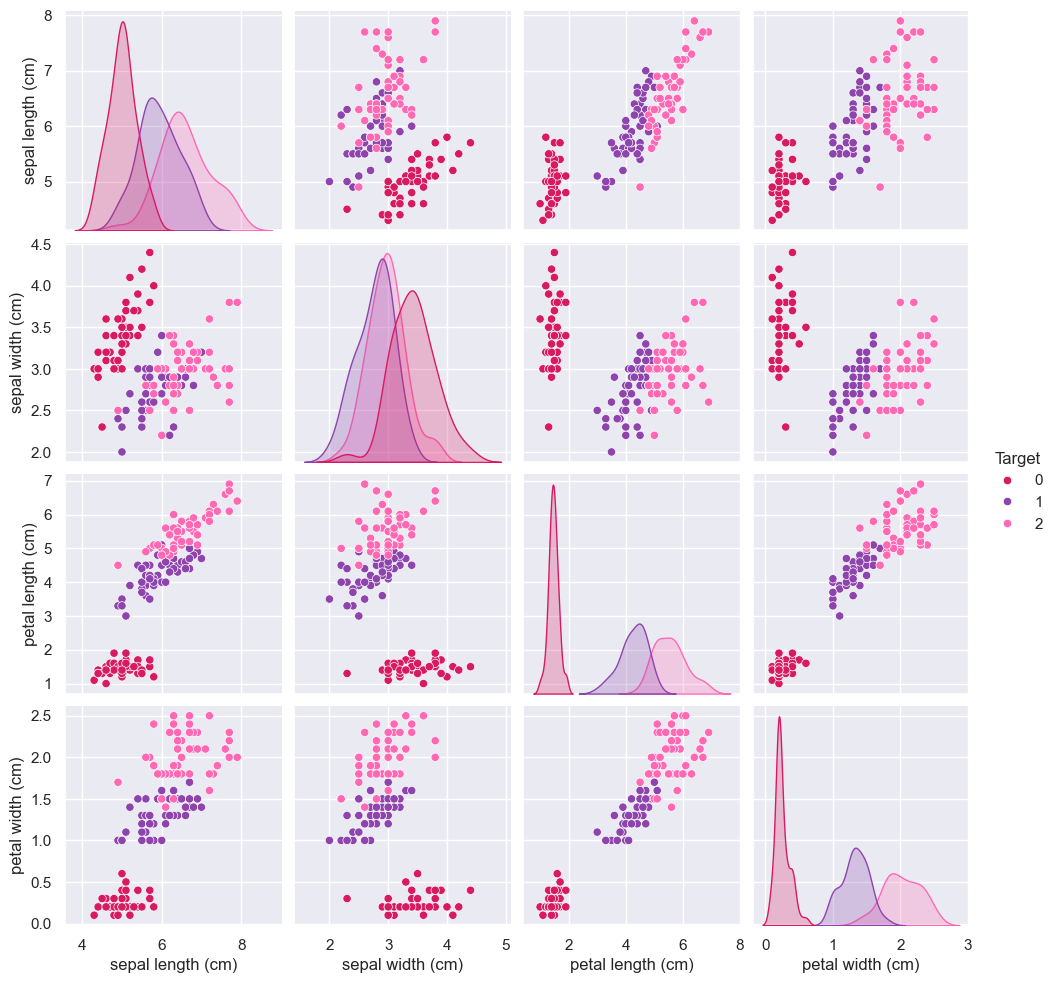

In [20]:
df = pd.DataFrame.from_dict(iris_dataset['data'])  # Feature variables
df.columns = iris_dataset['feature_names']  # Add feature names as column labels
df['Target'] = iris_dataset['target']  # Add target column

custom_palette = ["#D81B60", "#8E44AD", "#FF69B4"] 
sns.set(style="darkgrid")
sns.pairplot(df, hue="Target", palette=custom_palette, diag_kind="kde", markers=["o", "o", "o"])
plt.show()

### Pairplot of the Iris Dataset

Above is a pairplot of the Iris dataset, showing the relationships between four features: sepal length, sepal width, petal length, and petal width. Each subplot represents a scatter plot of two features, with the diagonal subplots showing the distribution of each feature. The data points are color-coded based on the target species (0, 1, 2), with different colors representing different species. 

This visualization is interesting and relevant because it allows for the exploration of the relationships between different features and how they vary across different species of the Iris flower. 

**Key Inferences:**
- **Species Differentiation:** The pairplot shows clear clustering of data points, indicating that the different species (0, 1, 2) can be distinguished based on these features.
- **Feature Correlation:** There is a strong positive correlation between petal length and petal width across all species. This means that as the petal length increases, the petal width also tends to increase.
- **Sepal Characteristics:** Sepal length and sepal width do not show a strong correlation, suggesting that these features are more independent of each other compared to petal features.
- **Species-Specific Patterns:** Each species has distinct patterns in the scatter plots. For example, species 0 tends to have shorter petal lengths and widths compared to species 1 and 2.


In [21]:
number_features = X.shape[1]

print("Feature  Accuracy")
for i in range(number_features):
    X_single_feature = X[:, i].reshape(-1, 1)  # Select one feature at a time
    scores = cross_val_score(knn, X_single_feature, y, cv=5)  # 5-fold cross-validation
    print(f"{i}        {scores.mean():.4f}")

# Feature Selection: Select Best 3 Features
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)

# Print selected feature names
selected_feature_names = np.array(iris_dataset['feature_names'])[selector.get_support()]
print(f"Selected Features: {selected_feature_names}")

Feature  Accuracy
0        0.6867
1        0.5067
2        0.9533
3        0.9600
Selected Features: ['sepal length (cm)' 'petal length (cm)' 'petal width (cm)']


> Features 2 and 3 show significantly higher accuracies compared to features 0 and 1, indicating that petal length and petal width are more informative for distinguishing between the species in the Iris dataset.


Mean Accuracy After Feature Selection:
n_neighbors=1: 0.9647
n_neighbors=2: 0.9580
n_neighbors=3: 0.9653
n_neighbors=4: 0.9567
n_neighbors=5: 0.9660
n_neighbors=6: 0.9600
n_neighbors=7: 0.9667
n_neighbors=8: 0.9613
n_neighbors=9: 0.9680
n_neighbors=10: 0.9653
n_neighbors=11: 0.9673
n_neighbors=12: 0.9653
n_neighbors=13: 0.9680
n_neighbors=14: 0.9620
n_neighbors=15: 0.9620
n_neighbors=16: 0.9587
n_neighbors=17: 0.9620
n_neighbors=18: 0.9547
n_neighbors=19: 0.9633
n_neighbors=20: 0.9520
n_neighbors=21: 0.9573
n_neighbors=22: 0.9507
n_neighbors=23: 0.9560
n_neighbors=24: 0.9493
n_neighbors=25: 0.9547
n_neighbors=26: 0.9500
n_neighbors=27: 0.9533
n_neighbors=28: 0.9447
n_neighbors=29: 0.9493
n_neighbors=30: 0.9440
n_neighbors=31: 0.9473
n_neighbors=32: 0.9407
n_neighbors=33: 0.9440
n_neighbors=34: 0.9440
n_neighbors=35: 0.9440
n_neighbors=36: 0.9420
n_neighbors=37: 0.9400
n_neighbors=38: 0.9393
n_neighbors=39: 0.9367
n_neighbors=40: 0.9307


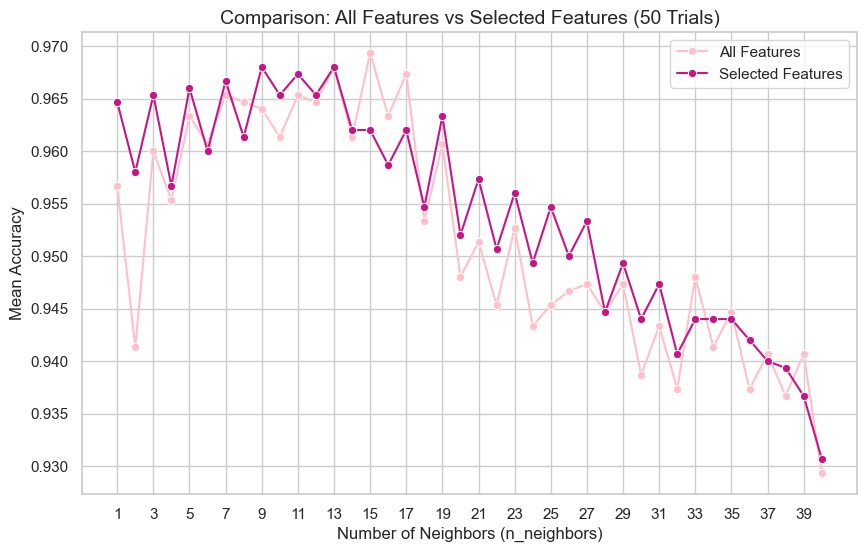

In [22]:
# Use only selected best features for new KNN trials
X_selected = selector.fit_transform(X, y)  # Already computed before

num_trials = 50  # Number of trials
accuracy_scores_selected = {n: [] for n in n_range}

# Perform 50 trials using only selected features
for _ in range(num_trials):
    X_train_sel, X_test_sel, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, stratify=y, random_state=None
    )

    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_sel, y_train)
        accuracy = knn.score(X_test_sel, y_test)
        accuracy_scores_selected[n].append(accuracy)

# Compute mean accuracy for each n_neighbors
mean_accuracies_selected = [np.mean(accuracy_scores_selected[n]) for n in n_range]

# Print mean scores after feature selection
print("\nMean Accuracy After Feature Selection:")
for n, acc in zip(n_range, mean_accuracies_selected):
    print(f"n_neighbors={n}: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Original Accuracy Plot (Before Feature Selection)
sns.lineplot(x=n_range, y=mean_accuracies, label="All Features", marker="o", color="#FFC0CB")

# Accuracy After Feature Selection
sns.lineplot(x=n_range, y=mean_accuracies_selected, label="Selected Features", marker="o", color="#C71585")

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Comparison: All Features vs Selected Features (50 Trials)", fontsize=14)
plt.xticks(range(1, 41, 2))
plt.legend()
plt.show()

## Comparison of All Features vs. Selected Features in a KNN Model

This graph compares the mean accuracy of a K-Nearest Neighbors (KNN) model using all features versus a selected subset of features across varying numbers of neighbors (n_neighbors).  The results are averaged over 50 trials for each data point.

**Key Observations:**

* **Similar Trend:** Both "All Features" and "Selected Features" exhibit similar trends, with higher accuracy at lower n_neighbors and decreasing accuracy as n_neighbors increases. This is typical KNN behavior.
* **Potential Advantage of Selected Features:** The "Selected Features" line appears to show slightly higher accuracy than the "All Features" line, particularly in the lower to mid-range of n_neighbors. This suggests that feature selection might improve performance by reducing noise or irrelevant information.
* **Optimal n_neighbors:** The optimal n_neighbors appears to be in the lower to mid-range (likely between 1 and 15 based on the graph).
* **Performance Decline at High n_neighbors:**  At higher n_neighbors, both models show a decline in accuracy, likely due to over-smoothing and underfitting.

**Conclusion:**

The graph indicates that using selected features might offer a slight performance advantage over using all features in a KNN model.  Further investigation is needed to determine the optimal feature selection method, understand the impact of the specific dataset, and assess the statistical significance of the results.

In [23]:
# Find optimal n_neighbors using selected features
optimal_n_selected = list(n_range)[np.argmax(mean_accuracies_selected)]
optimal_accuracy_selected = max(mean_accuracies_selected)

print("\nOptimal n_neighbor (After Feature Selection):")
print(f"n_neighbors = {optimal_n_selected}")
print(f"Mean Accuracy : {optimal_accuracy_selected:.4f}")


Optimal n_neighbor (After Feature Selection):
n_neighbors = 9
Mean Accuracy : 0.9680


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=None)

knn = KNeighborsClassifier(n_neighbors=optimal_n_selected)
knn.fit(X_train, y_train)

print("Test set score after feature selection: {:.2f}".format(knn.score(X_test, y_test)))

Test set score after feature selection: 0.95


---

## **Dataset 2: Boston Cancer**

In [25]:
from sklearn.datasets import load_breast_cancer
boston_cancer_dataset = load_breast_cancer()

#### Exploring Data

In [26]:
print("Important Keys:\n{}".format(boston_cancer_dataset.keys()))

Important Keys:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [27]:
print(boston_cancer_dataset.data.shape)

(569, 30)


#### Understanding the Targets

In [28]:
for i, name in enumerate(boston_cancer_dataset['target_names'], start=1):
    print(f"target {i}: {name}")

target 1: malignant
target 2: benign


#### Understanding the Features

In [29]:
for i, name in enumerate(boston_cancer_dataset['feature_names'], start=1):
    print(f"feature {i}: {name}")

feature 1: mean radius
feature 2: mean texture
feature 3: mean perimeter
feature 4: mean area
feature 5: mean smoothness
feature 6: mean compactness
feature 7: mean concavity
feature 8: mean concave points
feature 9: mean symmetry
feature 10: mean fractal dimension
feature 11: radius error
feature 12: texture error
feature 13: perimeter error
feature 14: area error
feature 15: smoothness error
feature 16: compactness error
feature 17: concavity error
feature 18: concave points error
feature 19: symmetry error
feature 20: fractal dimension error
feature 21: worst radius
feature 22: worst texture
feature 23: worst perimeter
feature 24: worst area
feature 25: worst smoothness
feature 26: worst compactness
feature 27: worst concavity
feature 28: worst concave points
feature 29: worst symmetry
feature 30: worst fractal dimension


In [30]:
unique_targets = set(boston_cancer_dataset['target'])
for target in unique_targets:
    print(f"{target}: {boston_cancer_dataset['target_names'][target]}")

0: malignant
1: benign


#### Distrubution of Classes

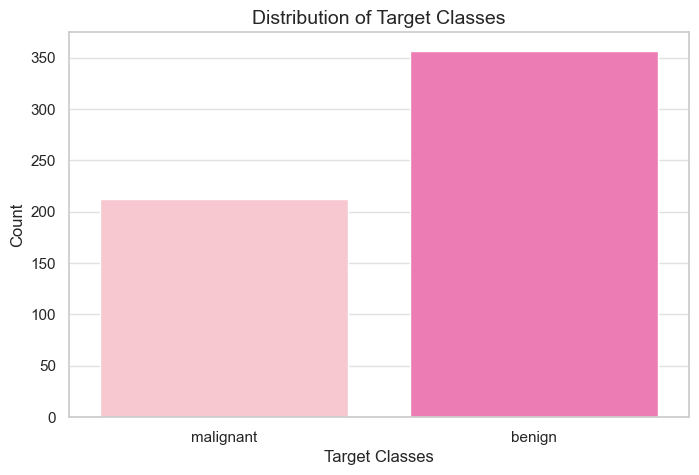

In [31]:
target_names = [boston_cancer_dataset['target_names'][t] for t in boston_cancer_dataset['target']]
target_dist = pd.DataFrame({"Target Class": target_names})

pink_palette = ["#FFC0CB", "#FF69B4", "#C71585"]  

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=target_dist, x="Target Class", palette=pink_palette)

plt.xlabel("Target Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Target Classes", fontsize=14)
plt.grid(axis='y', alpha=0.6)
plt.show()

## **KNN Implementation**

In [38]:
X_bc, y_bc = boston_cancer_dataset.data, boston_cancer_dataset.target

In [39]:
# Define range of n_neighbors
n_range_bc = range(1, 41)
num_trials_bc = 50  # Number of trials

In [41]:
# Store accuracies
accuracy_scores_bc = {n: [] for n in n_range_bc}

In [42]:
# Perform 50 trials
for _ in range(num_trials_bc):
    X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
        X_bc, y_bc, test_size=0.2, stratify=y_bc, random_state=None
    )

    for n in n_range_bc:
        knn_bc = KNeighborsClassifier(n_neighbors=n)
        knn_bc.fit(X_train_bc, y_train_bc)
        accuracy_bc = knn_bc.score(X_test_bc, y_test_bc)
        accuracy_scores_bc[n].append(accuracy_bc)


In [43]:
# Compute mean accuracy for each n_neighbors
mean_accuracies_bc = [np.mean(accuracy_scores_bc[n]) for n in n_range_bc]

In [44]:
# Print mean scores
print("Mean Accuracy Scores:")
for n, acc in zip(n_range_bc, mean_accuracies_bc):
    print(f"n_neighbors={n}: {acc:.4f}")

Mean Accuracy Scores:
n_neighbors=1: 0.9196
n_neighbors=2: 0.9182
n_neighbors=3: 0.9323
n_neighbors=4: 0.9314
n_neighbors=5: 0.9342
n_neighbors=6: 0.9356
n_neighbors=7: 0.9330
n_neighbors=8: 0.9368
n_neighbors=9: 0.9346
n_neighbors=10: 0.9372
n_neighbors=11: 0.9361
n_neighbors=12: 0.9386
n_neighbors=13: 0.9361
n_neighbors=14: 0.9375
n_neighbors=15: 0.9346
n_neighbors=16: 0.9367
n_neighbors=17: 0.9346
n_neighbors=18: 0.9349
n_neighbors=19: 0.9326
n_neighbors=20: 0.9337
n_neighbors=21: 0.9323
n_neighbors=22: 0.9339
n_neighbors=23: 0.9314
n_neighbors=24: 0.9316
n_neighbors=25: 0.9300
n_neighbors=26: 0.9300
n_neighbors=27: 0.9286
n_neighbors=28: 0.9295
n_neighbors=29: 0.9261
n_neighbors=30: 0.9270
n_neighbors=31: 0.9256
n_neighbors=32: 0.9263
n_neighbors=33: 0.9232
n_neighbors=34: 0.9249
n_neighbors=35: 0.9230
n_neighbors=36: 0.9247
n_neighbors=37: 0.9219
n_neighbors=38: 0.9244
n_neighbors=39: 0.9223
n_neighbors=40: 0.9235


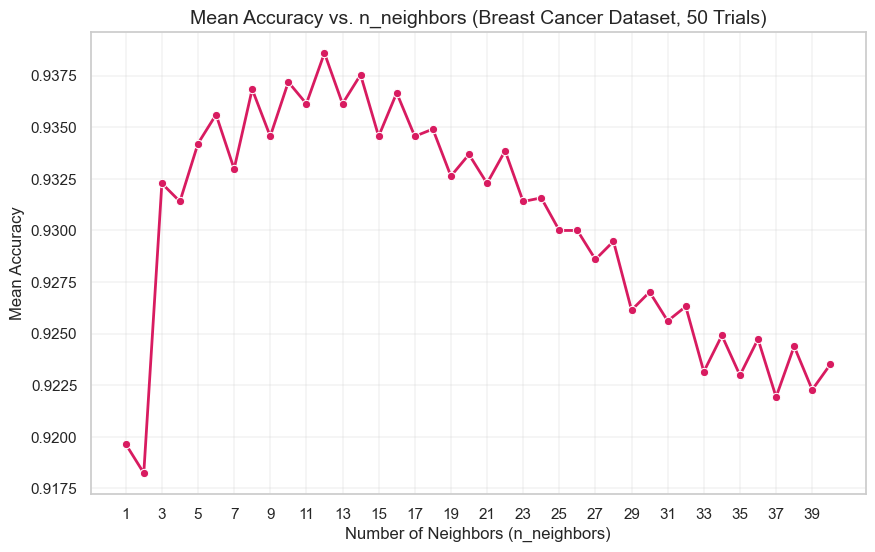

In [45]:
# Plot accuracy vs. n_neighbors
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.grid(color='lightgray', linestyle='-', linewidth=0.3)

sns.lineplot(x=n_range_bc, y=mean_accuracies_bc, marker="o", linewidth=2, markersize=6, color="#D81B60")  

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Mean Accuracy vs. n_neighbors (Breast Cancer Dataset, 50 Trials)", fontsize=14)
plt.xticks(range(1, 41, 2))
plt.show()


## Mean Accuracy vs. n_neighbors (Breast Cancer Dataset, 50 Trials)

This graph shows the mean accuracy of a model (likely KNN) on the Breast Cancer Dataset across different numbers of neighbors (n_neighbors), averaged over 50 trials.

**Key Observations:**

* **Initial Rapid Increase:**  Accuracy rises sharply from n_neighbors = 1 to around n_neighbors = 5.
* **Plateau and Gradual Decline:** After the initial rise, the accuracy plateaus and then gradually decreases with increasing n_neighbors.
* **Peak Around n_neighbors = 12:** The highest accuracy appears to be around n_neighbors = 12.

**Conclusion:**

This graph suggests an optimal n_neighbors value around 11 for this model and dataset. The initial increase likely reflects the model moving away from overfitting to a single data point (n_neighbors = 1). The gradual decline indicates the model starts to underfit as it averages over too many neighbors.

In [46]:
# Find optimal n_neighbors
optimal_n_bc = list(n_range_bc)[np.argmax(mean_accuracies_bc)]
optimal_accuracy_bc = max(mean_accuracies_bc)

print("\nOptimal n_neighbor (Breast Cancer Dataset):")
print(f"n_neighbors = {optimal_n_bc}")
print(f"Mean Accuracy : {optimal_accuracy_bc:.4f}")


Optimal n_neighbor (Breast Cancer Dataset):
n_neighbors = 12
Mean Accuracy : 0.9386


In [48]:
# Split dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, stratify=y_bc, random_state=None
)

# Train the KNN model with the optimal number of neighbors
knn_bc_final = KNeighborsClassifier(n_neighbors=optimal_n_bc)
knn_bc_final.fit(X_train_bc, y_train_bc)

# Evaluate and print the test set accuracy
print("Breast Cancer Dataset - Test Set Accuracy: {:.2f}".format(knn_bc_final.score(X_test_bc, y_test_bc)))

Breast Cancer Dataset - Test Set Accuracy: 0.93


## **Best Features Selection**

### Exploring Feature Correlations

The following sections will focus on exploring correlations between features within the dataset.  Given the total of 30 features, visualizing all pairwise correlations in a single plot would be overwhelming and likely hinder insights rather than enhance them.  Therefore, we will employ strategies such as **grouping related features to create more manageable and informative visualizations.** This approach allows us to focus on specific aspects of the data and identify potential relationships within and between feature groups without the complexity of a single, cluttered visualization.

In [49]:
# Convert breast cancer dataset to a DataFrame
df_bc = pd.DataFrame.from_dict(boston_cancer_dataset['data'])  
df_bc.columns = boston_cancer_dataset['feature_names']  # Assign feature names as column labels
df_bc['Target'] = boston_cancer_dataset['target']
df_bc.head() 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [50]:
# Group 1: Mean Feature Measurements
group1_columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'Target']
df_bc_group1 = df_bc[group1_columns]

# Group 2: Worst Feature Measurements
group2_columns = ['worst concavity', 'worst smoothness', 'worst symmetry', 'worst fractal dimension', 'Target']
df_bc_group2 = df_bc[group2_columns]

# Group 3: Mean & Worst Compactness, Concavity, and Symmetry
group3_columns = ['mean compactness', 'mean concavity', 'mean symmetry', 'worst compactness', 'Target']
df_bc_group3 = df_bc[group3_columns]

# Group 4: Standard Error Features (More Variability Analysis)
group4_columns = ['radius error', 'texture error', 'perimeter error', 'area error', 'Target']
df_bc_group4 = df_bc[group4_columns]


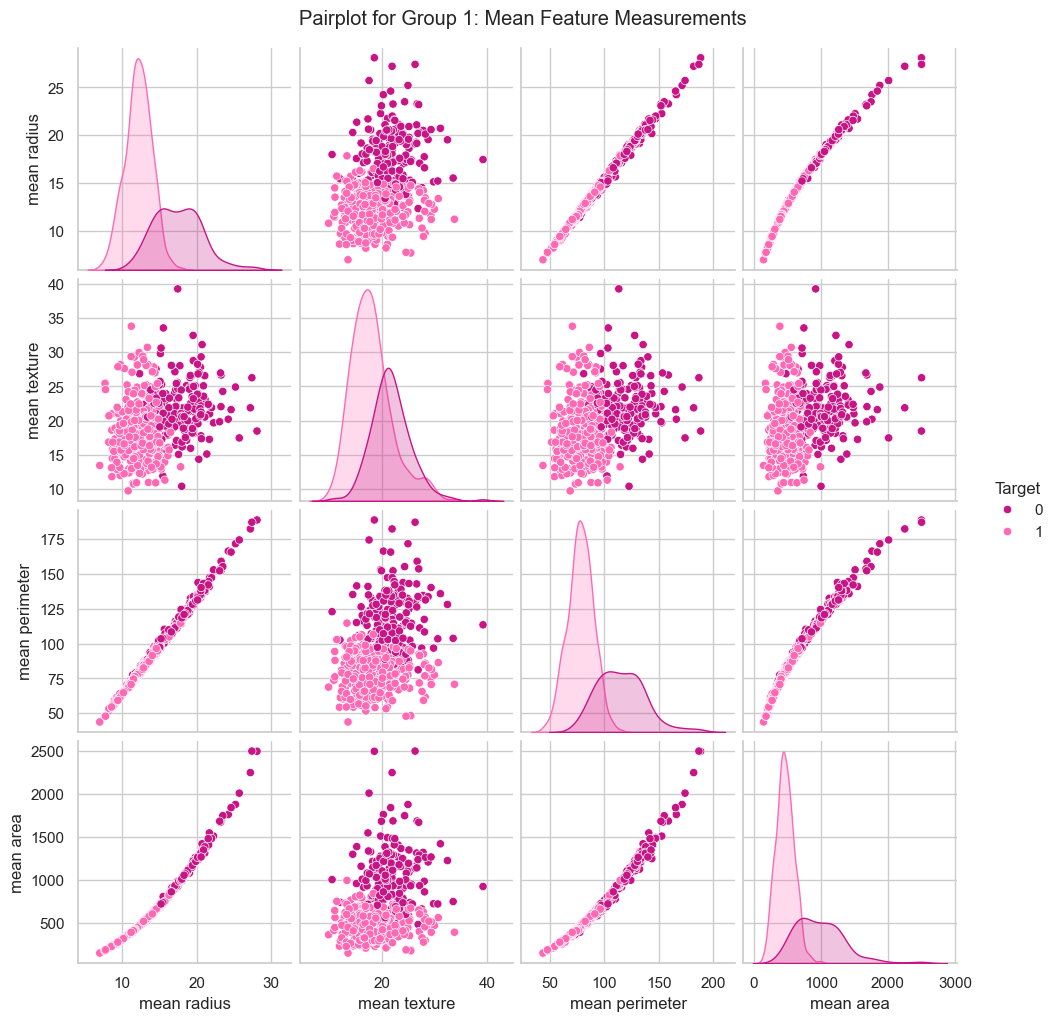

In [51]:
sns.set_style("whitegrid")
palette_colors = {0: "#C71585", 1: "#FF69B4"} 

# Pairplot for Group 1
sns.pairplot(df_bc_group1, hue="Target", palette=palette_colors)
plt.suptitle("Pairplot for Group 1: Mean Feature Measurements", y=1.02)
plt.show()


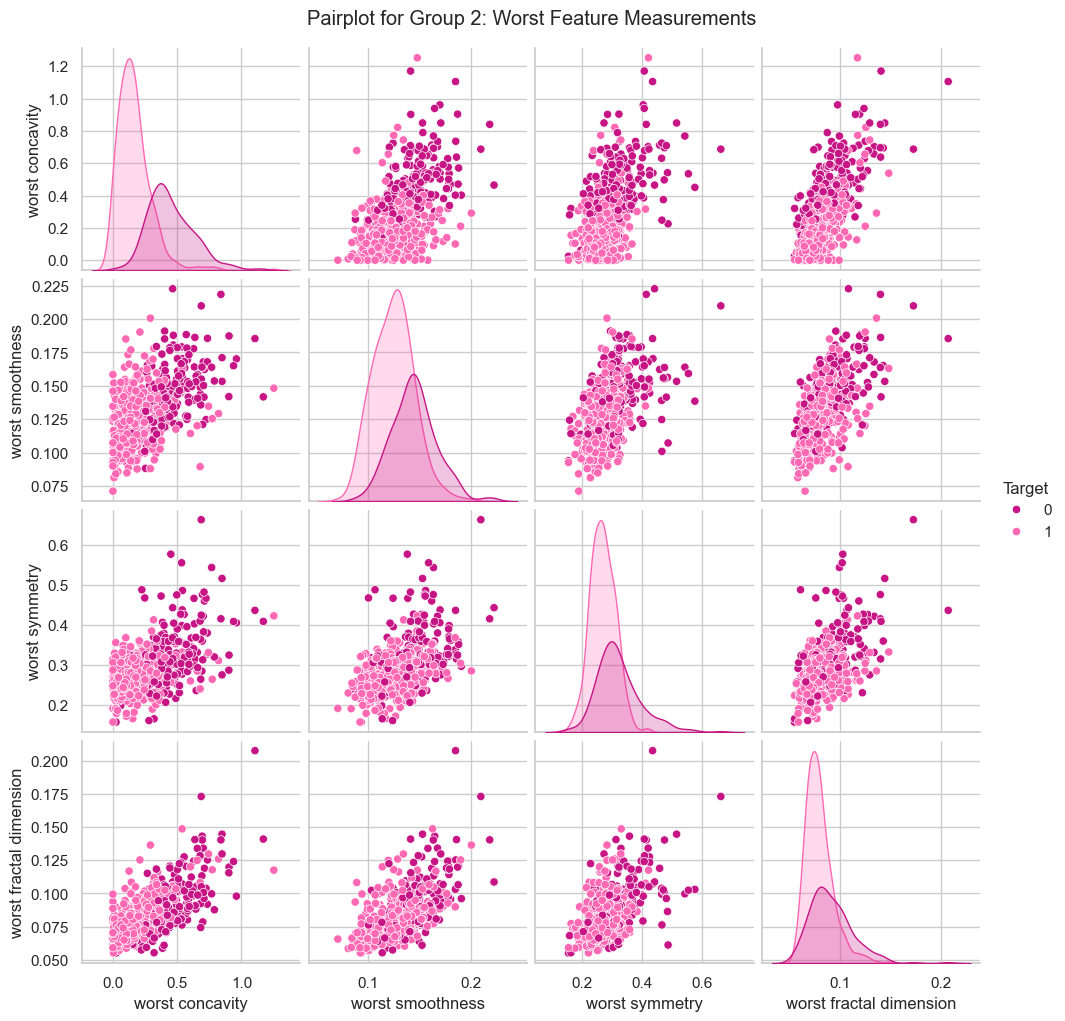

In [52]:
# Pairplot for Group 2
sns.pairplot(df_bc_group2, hue="Target", palette=palette_colors)
plt.suptitle("Pairplot for Group 2: Worst Feature Measurements", y=1.02)
plt.show()

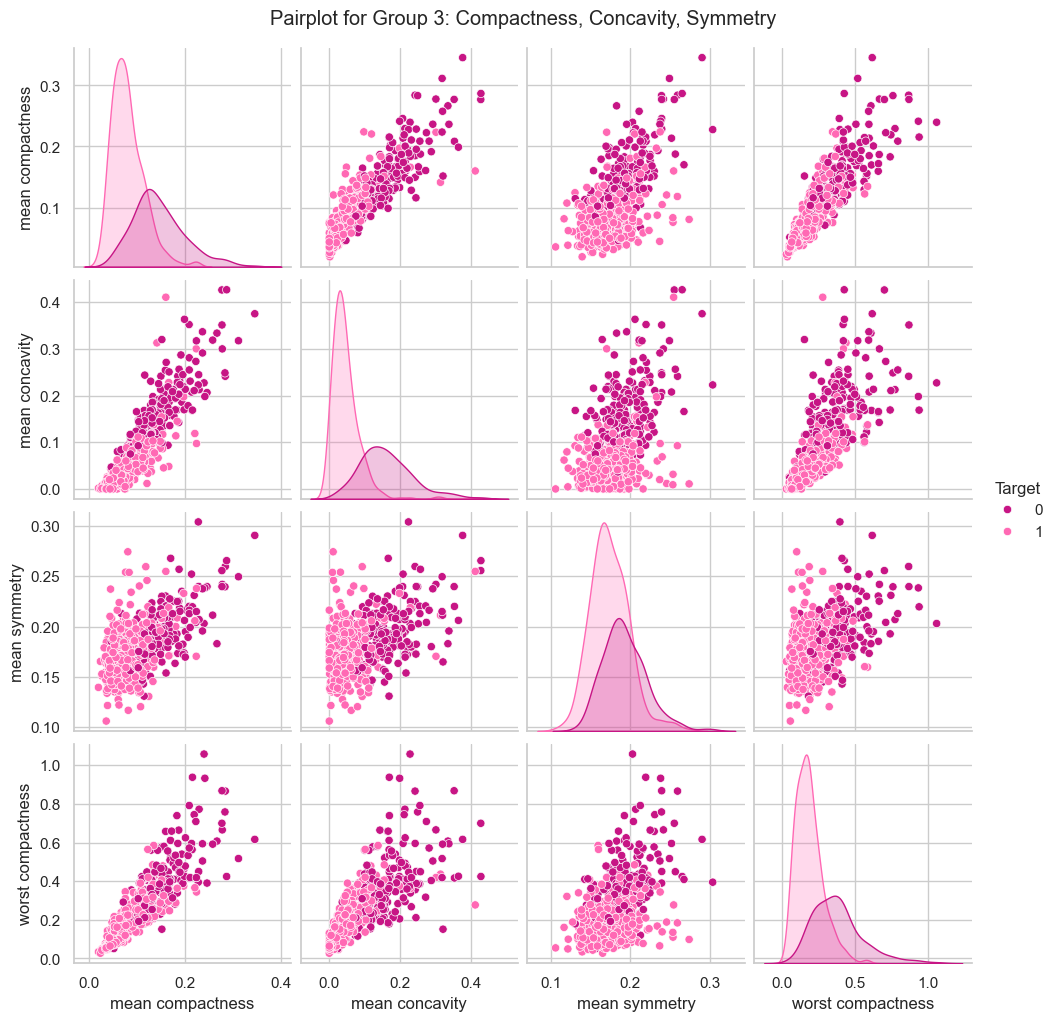

In [53]:
# Pairplot for Group 3
sns.pairplot(df_bc_group3, hue="Target", palette=palette_colors)
plt.suptitle("Pairplot for Group 3: Compactness, Concavity, Symmetry", y=1.02)
plt.show() 

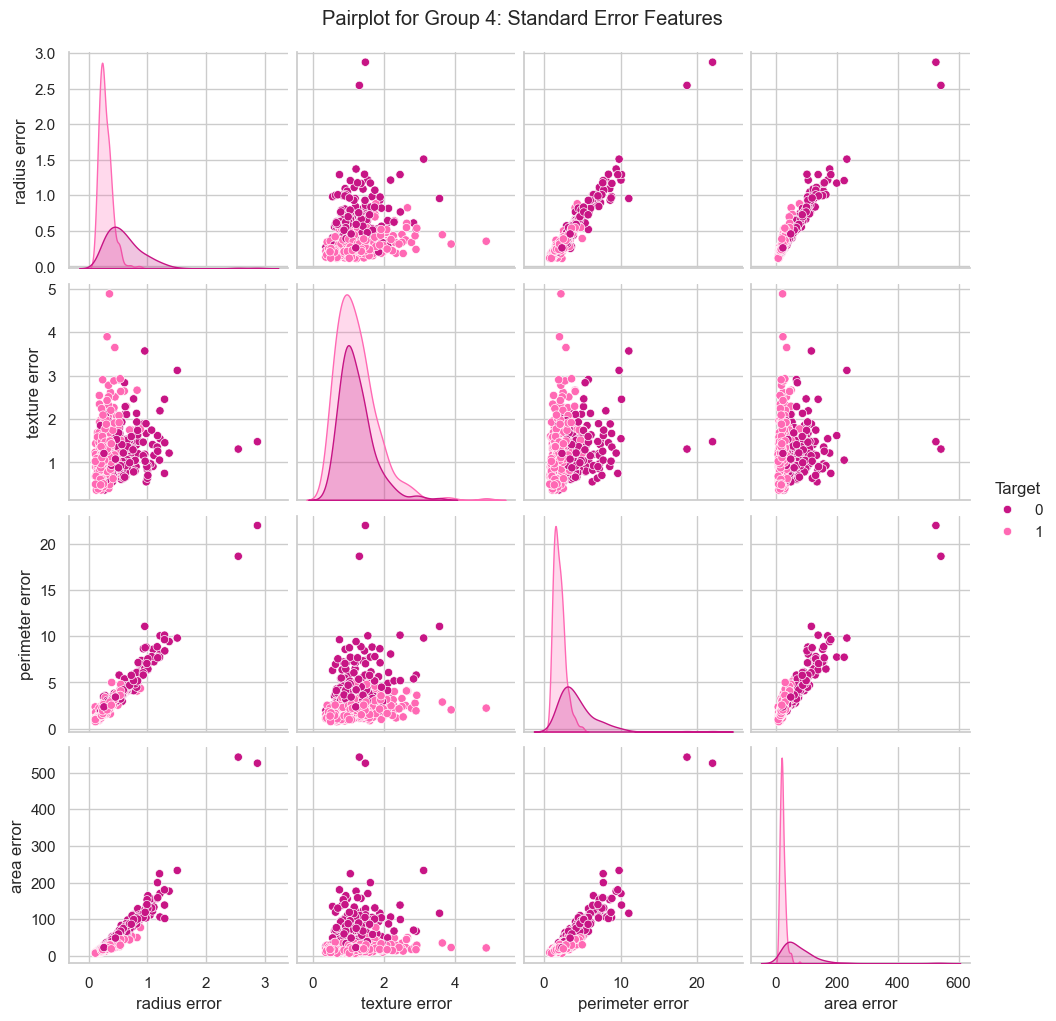

In [54]:
# Pairplot for Group 4
sns.pairplot(df_bc_group4, hue="Target", palette=palette_colors)
plt.suptitle("Pairplot for Group 4: Standard Error Features", y=1.02)
plt.show()

### Cross Validation

In [55]:
# Number of features in the breast cancer dataset
number_features_bc = X_bc.shape[1]

print("Feature  Accuracy")
for i in range(number_features_bc):
    X_single_feature_bc = X_bc[:, i].reshape(-1, 1)  # Select one feature at a time
    scores_bc = cross_val_score(knn_bc, X_single_feature_bc, y_bc, cv=5)  # 5-fold cross-validation
    print(f"{i}        {scores_bc.mean():.4f}")

# Feature Selection: Select Best 10 Features
selector_bc = SelectKBest(score_func=f_classif, k=10)
X_selected_bc = selector_bc.fit_transform(X_bc, y_bc)

# Print selected feature names
selected_feature_names_bc = np.array(boston_cancer_dataset['feature_names'])[selector_bc.get_support()]
print(f"Selected Features: {selected_feature_names_bc}")

Feature  Accuracy
0        0.8858
1        0.7293
2        0.8858
3        0.8840
4        0.6520
5        0.7961
6        0.8788
7        0.9104
8        0.6661
9        0.6344
10        0.8032
11        0.5940
12        0.8226
13        0.8717
14        0.6151
15        0.6907
16        0.7101
17        0.7311
18        0.6239
19        0.6381
20        0.9139
21        0.7205
22        0.9121
23        0.9069
24        0.7081
25        0.7961
26        0.8225
27        0.9104
28        0.6994
29        0.6924
Selected Features: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


## **Re-implementing KNN based on Selected features**


Mean Accuracy After Feature Selection:
n_neighbors=1: 0.9109
n_neighbors=2: 0.9005
n_neighbors=3: 0.9209
n_neighbors=4: 0.9237
n_neighbors=5: 0.9244
n_neighbors=6: 0.9267
n_neighbors=7: 0.9263
n_neighbors=8: 0.9302
n_neighbors=9: 0.9286
n_neighbors=10: 0.9312
n_neighbors=11: 0.9293
n_neighbors=12: 0.9302
n_neighbors=13: 0.9277
n_neighbors=14: 0.9281
n_neighbors=15: 0.9261
n_neighbors=16: 0.9270
n_neighbors=17: 0.9256
n_neighbors=18: 0.9274
n_neighbors=19: 0.9261
n_neighbors=20: 0.9277
n_neighbors=21: 0.9270
n_neighbors=22: 0.9274
n_neighbors=23: 0.9251
n_neighbors=24: 0.9254
n_neighbors=25: 0.9235
n_neighbors=26: 0.9225
n_neighbors=27: 0.9211
n_neighbors=28: 0.9214
n_neighbors=29: 0.9204
n_neighbors=30: 0.9200
n_neighbors=31: 0.9179
n_neighbors=32: 0.9191
n_neighbors=33: 0.9172
n_neighbors=34: 0.9182
n_neighbors=35: 0.9172
n_neighbors=36: 0.9182
n_neighbors=37: 0.9177
n_neighbors=38: 0.9186
n_neighbors=39: 0.9182
n_neighbors=40: 0.9182


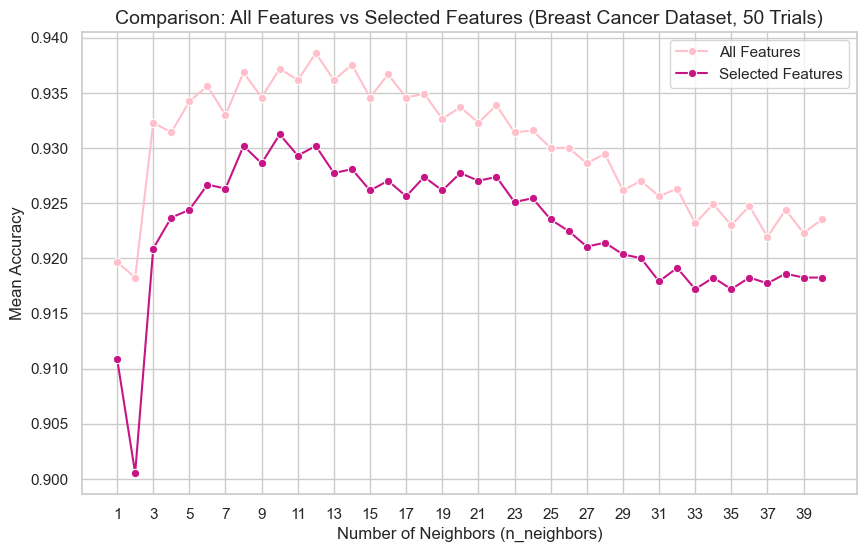

In [56]:
# Store accuracies for selected features
accuracy_scores_selected_bc = {n: [] for n in n_range_bc}

# Perform 50 trials using only selected features
for _ in range(num_trials_bc):
    X_train_sel_bc, X_test_sel_bc, y_train_sel_bc, y_test_sel_bc = train_test_split(
        X_selected_bc, y_bc, test_size=0.2, stratify=y_bc, random_state=None
    )

    for n in n_range_bc:
        knn_bc = KNeighborsClassifier(n_neighbors=n)
        knn_bc.fit(X_train_sel_bc, y_train_sel_bc)
        accuracy_bc = knn_bc.score(X_test_sel_bc, y_test_sel_bc)
        accuracy_scores_selected_bc[n].append(accuracy_bc)

# Compute mean accuracy for selected features
mean_accuracies_selected_bc = [np.mean(accuracy_scores_selected_bc[n]) for n in n_range_bc]

# Print mean scores after feature selection
print("\nMean Accuracy After Feature Selection:")
for n, acc in zip(n_range_bc, mean_accuracies_selected_bc):
    print(f"n_neighbors={n}: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Original Accuracy Plot (Before Feature Selection)
sns.lineplot(x=n_range_bc, y=mean_accuracies_bc, label="All Features", marker="o", color="#FFC0CB")

# Accuracy After Feature Selection
sns.lineplot(x=n_range_bc, y=mean_accuracies_selected_bc, label="Selected Features", marker="o", color="#C71585")

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Comparison: All Features vs Selected Features (Breast Cancer Dataset, 50 Trials)", fontsize=14)
plt.xticks(range(1, 41, 2))
plt.legend()
plt.show()

In [57]:
# Find optimal n_neighbors using selected features
optimal_n_selected_bc = list(n_range_bc)[np.argmax(mean_accuracies_selected_bc)]
optimal_accuracy_selected_bc = max(mean_accuracies_selected_bc)

print("\nOptimal n_neighbor (After Feature Selection):")
print(f"n_neighbors = {optimal_n_selected_bc}")
print(f"Mean Accuracy : {optimal_accuracy_selected_bc:.4f}")


Optimal n_neighbor (After Feature Selection):
n_neighbors = 10
Mean Accuracy : 0.9312


In [58]:
# Train and evaluate final model
X_train_sel_bc, X_test_sel_bc, y_train_sel_bc, y_test_sel_bc = train_test_split(
    X_selected_bc, y_bc, random_state=None, stratify=y_bc, test_size=0.2
)

knn_selected_bc = KNeighborsClassifier(n_neighbors=optimal_n_selected_bc)
knn_selected_bc.fit(X_train_sel_bc, y_train_sel_bc)

print("Test set score (After Feature Selection): {:.2f}".format(knn_selected_bc.score(X_test_sel_bc, y_test_sel_bc)))

Test set score (After Feature Selection): 0.96


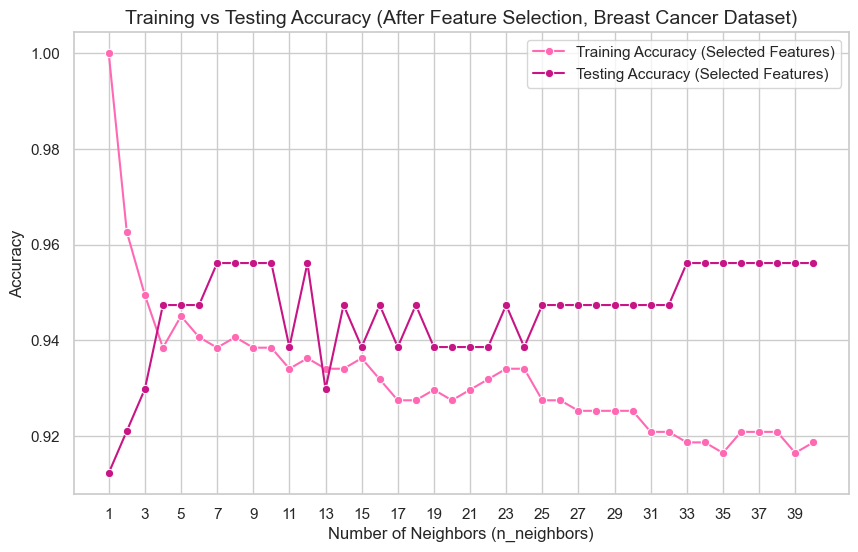

In [59]:
# Lists to store accuracy values
train_accuracies_selected_bc = []
test_accuracies_selected_bc = []

for n in n_range_bc:
    knn_selected_bc = KNeighborsClassifier(n_neighbors=n)
    knn_selected_bc.fit(X_train_sel_bc, y_train_sel_bc)

    train_accuracies_selected_bc.append(knn_selected_bc.score(X_train_sel_bc, y_train_sel_bc))
    test_accuracies_selected_bc.append(knn_selected_bc.score(X_test_sel_bc, y_test_sel_bc))

# Plot Training vs Testing Accuracy
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(x=list(n_range_bc), y=train_accuracies_selected_bc, label="Training Accuracy (Selected Features)", marker="o", color="#FF69B4")
sns.lineplot(x=list(n_range_bc), y=test_accuracies_selected_bc, label="Testing Accuracy (Selected Features)", marker="o", color="#C71585")

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy (After Feature Selection, Breast Cancer Dataset)", fontsize=14)
plt.xticks(range(1, 41, 2))
plt.legend()
plt.show()

---

## **DATASET 3: UPCAT**

In [60]:
upcat_dataset = pd.read_excel('UPCAT_DATA2.xlsx')

#### Explore Data

In [61]:
upcat_dataset.head()

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.4098,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.7008,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.7172,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.7049,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.4713,1,67.0,56,1,5.0,0


In [62]:
print(upcat_dataset['Target'].value_counts())

Target
0    530
1    480
Name: count, dtype: int64


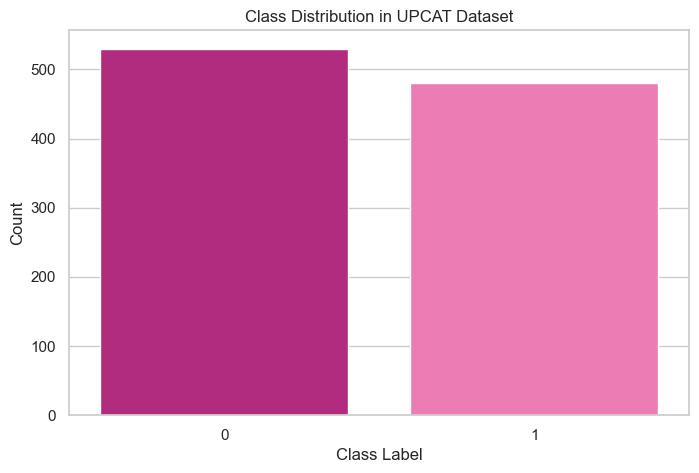

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=upcat_dataset, palette=["#C71585", "#FF69B4"])
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution in UPCAT Dataset")
plt.show()

In [64]:
# Check for missing values
print(upcat_dataset.isnull().sum())

Batch     0
Eng7      0
Eng8      1
Eng9      0
Math7     0
Math8     0
Math9     1
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      1
UP        0
IQ        1
SA        0
C1        0
C2        2
Target    0
dtype: int64


In [65]:
# Option 1: Drop rows with NaN values
upcat_dataset = upcat_dataset.dropna()

## **KNN implementation**

In [66]:
# Define X (features) and y (target)
X = upcat_dataset.drop(columns=['Target']).values  
y = upcat_dataset['Target'].values 

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Standardize the features (this is important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Range of k values to try
n_range = range(1, 41)

# Store mean accuracy for each k
mean_accuracies = []

print("Accuracy scores for each n_neighbors:")
for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"n_neighbor = {n}: {mean_accuracy:.4f}")

Accuracy scores for each n_neighbors:
n_neighbor = 1: 0.8406
n_neighbor = 2: 0.8207
n_neighbor = 3: 0.8556
n_neighbor = 4: 0.8431
n_neighbor = 5: 0.8643
n_neighbor = 6: 0.8481
n_neighbor = 7: 0.8543
n_neighbor = 8: 0.8456
n_neighbor = 9: 0.8593
n_neighbor = 10: 0.8518
n_neighbor = 11: 0.8555
n_neighbor = 12: 0.8605
n_neighbor = 13: 0.8630
n_neighbor = 14: 0.8617
n_neighbor = 15: 0.8642
n_neighbor = 16: 0.8592
n_neighbor = 17: 0.8605
n_neighbor = 18: 0.8618
n_neighbor = 19: 0.8642
n_neighbor = 20: 0.8655
n_neighbor = 21: 0.8680
n_neighbor = 22: 0.8755
n_neighbor = 23: 0.8730
n_neighbor = 24: 0.8692
n_neighbor = 25: 0.8667
n_neighbor = 26: 0.8680
n_neighbor = 27: 0.8668
n_neighbor = 28: 0.8655
n_neighbor = 29: 0.8668
n_neighbor = 30: 0.8680
n_neighbor = 31: 0.8680
n_neighbor = 32: 0.8643
n_neighbor = 33: 0.8667
n_neighbor = 34: 0.8655
n_neighbor = 35: 0.8655
n_neighbor = 36: 0.8643
n_neighbor = 37: 0.8618
n_neighbor = 38: 0.8630
n_neighbor = 39: 0.8605
n_neighbor = 40: 0.8630


In [68]:
# Find the best k
optimal_n = list(n_range)[np.argmax(mean_accuracies)]
optimal_accuracy = max(mean_accuracies)

print("\nOptimal n_neighbor:")
print(f"n_neighbors = {optimal_n}")
print(f"Mean Accuracy: {optimal_accuracy:.4f}")


Optimal n_neighbor:
n_neighbors = 22
Mean Accuracy: 0.8755


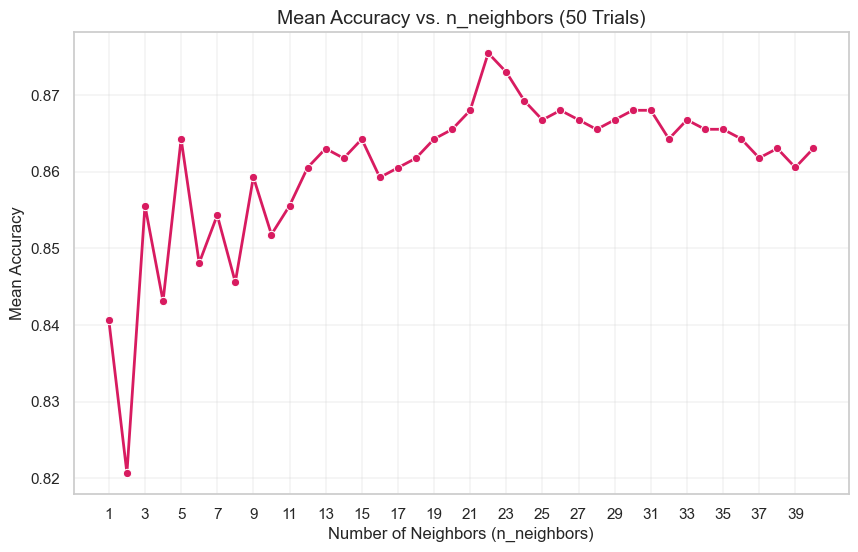

In [69]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.grid(color='lightgray', linestyle='-', linewidth=0.3)

sns.lineplot(x=list(n_range), y=mean_accuracies, marker="o", linewidth=2, markersize=6, color="#D81B60")  

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Mean Accuracy vs. n_neighbors (50 Trials)", fontsize=14)  # Updated to match n_range
plt.xticks(range(1, 41, 2))
plt.show()


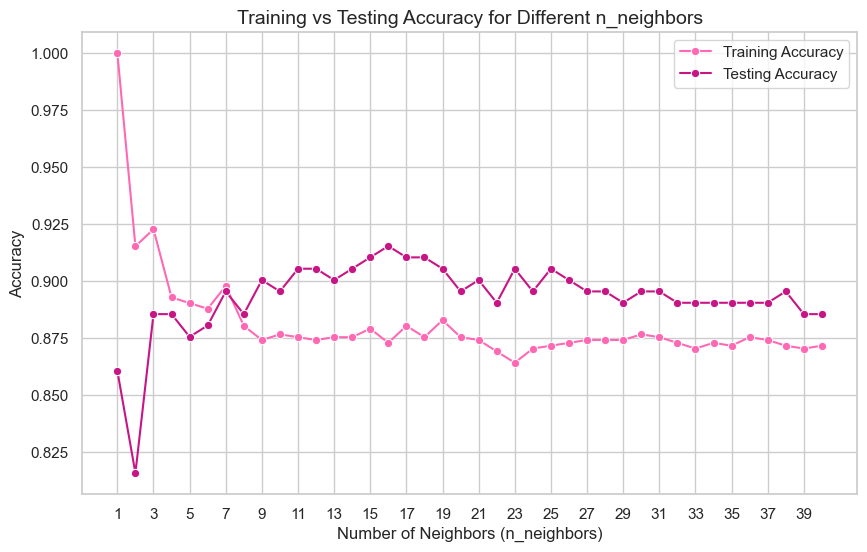

In [72]:
# Lists to store accuracy values
train_accuracies = []
test_accuracies = []

for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Store training and testing accuracy
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot Training Accuracy (Light Pink)
sns.lineplot(x=list(n_range), y=train_accuracies, label="Training Accuracy", marker="o", color="#FF69B4")

# Plot Testing Accuracy (Deep Pink)
sns.lineplot(x=list(n_range), y=test_accuracies, label="Testing Accuracy", marker="o", color="#C71585")

plt.xlabel("Number of Neighbors (n_neighbors)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy for Different n_neighbors", fontsize=14)
plt.xticks(range(1, 41, 2))
plt.legend()
plt.show()

## **Proportion Chance Criteria (PCC)**

Population per class:      0
1  478
0  526

1.25 * Proportion Chance Criterion: 62.642854875319436%


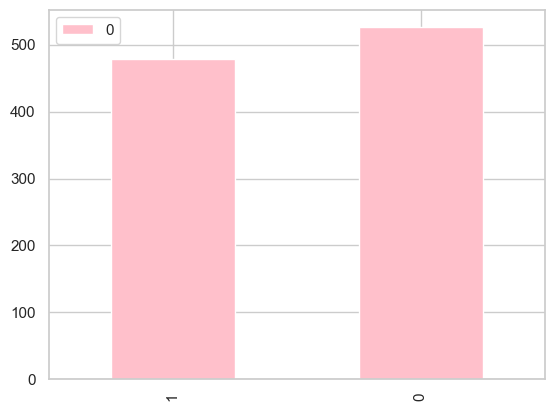

In [74]:
from collections import Counter
state_counts = Counter(upcat_dataset['Target'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', color = 'pink')

#calculate PCC
num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

## UPCAT Results Analysis: Pass/Fail Rates and PCC

This analysis examines the pass/fail rates for the University of the Philippines College Admission Test (UPCAT) and calculates the Proportion Chance Criterion (PCC).

**Key Observations:**

* **Pass/Fail Distribution:** The dataset contains the results of 1004 students who took the UPCAT. 478 students failed (class 0), and 526 students passed (class 1).
* **Near Balanced Classes:** The classes are relatively balanced, with a pass rate of approximately 52.4% and a fail rate of 47.6%. This is a much more even split than initially assumed when the classes were labeled "0" and "1".
* **PCC as Baseline:** The calculated PCC is 62.64%. This represents the accuracy a naive classifier (one that always predicts the majority class – in this case, passing) would achieve.

**Inferences:**

* **Reasonable Balance:** The distribution of pass/fail results is reasonably balanced.  While slightly more students passed, the difference is unlikely to cause significant bias in predictive models.
* **PCC Interpretation:** The 62.64% PCC serves as a baseline for evaluating the performance of any model attempting to predict UPCAT outcomes. A useful model should significantly outperform this baseline.
* **Focus on Predictive Features:** The primary goal now should be to identify the factors that strongly correlate with passing the UPCAT, such as high school grades, entrance exam scores, etc.  Addressing the small remaining class imbalance is of secondary importance.

**Conclusion:**

The UPCAT results dataset is reasonably balanced between passing and failing students. The PCC provides a performance baseline for predictive models. The focus should be on building models that exceed this baseline and identifying the key features that contribute to UPCAT success.


<div style="height: 3px; background-color: black; border-radius: 2px;"></div>  
